<a href="https://github.com/dcruzeneil/dcruzeneil.github.io/blob/main/posts/kernel-logistic-regression/KernelLogisticRegression.py"><b>An Implementation of Kernel Logistic Regression: <i>KernelLogisticRegression.py</i></b></a>

# Introduction 

In the <a href="https://dcruzeneil.github.io/posts/gradient-descent/">previous blog post</a>, we looked at Logistic Regression with Gradient Descent, which worked well for binary classification of data with linear decision boundaries. However, in this blog post we aim to:
<ol>
    <li> Appreciate the limitations of that approach by working with data that does not have Linear Decision Boundaries
    <li> Implement <u><i>Kernel</i></u> Logistic Regression and use that for binary classification of data that does not have Linear Decision Boundaries 
</ol>
Before we get started, let us get an understanding of what data with "non-linear decision boundaries" means. So far, we have been dealing with the "construction" of the best line which separates the data into one group or the other, however if you look at this data:
<br><br><center><img src="nonlinear.png" width=450 height=400/></center>

<br>Visually, it is pretty apparent that the data follows a circular pattern, with the two "classes" having different radii (varying distance from the center). So it is pretty apparent that if we tried our implementation of Logistic Regression with Gradient Descent, it would not do well since by the inherent nature of this data - there are no linear decision boundaries. 

# Logistic Regression versus Kernel Logistic Regression on Data with Non-Linear Decision Boundaries

In this section, we aim to understand the performance difference of <i>Logistic Regression</i> and <i>Kernel Logistic Regression</i> by generating some data which has clear non-linear decision boundaries. For the <i>Kernel Logistic Regression</i> we will be using the code that I wrote, however for the <i>Logistic Regression</i> we will be using scikit-learn's model. Let us go ahead and generate some synthetic data:

In [1]:
from KernelLogisticRegression import KernelLogisticRegression
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.datasets import make_moons, make_circles
from matplotlib import pyplot as plt
from mlxtend.plotting import plot_decision_regions
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
np.seterr(all="ignore")

X, y = make_moons(200, shuffle = True, noise = 0.2)

#visualizing the data
plt.scatter(X[:,0], X[:,1], c = y)
labels = plt.gca().set(xlabel = "Feature 1", ylabel = "Feature 2")

Clearly, the data above has non-linear decision boundaries and follows a "moon" like shape. Now, let us go ahead and fit our version of <i>Kernel Logistic Regression</i> and scikit-learn's <i>Logistic Regression</i> on the data:

In [2]:
#Regular logistic Regression 
LR = LogisticRegression()
LR.fit(X, y)

#Kernel Logistic Regression
KLR = KernelLogisticRegression(rbf_kernel, gamma = 10)
KLR.fit(X, y)

Now, we can go ahead and visualize how our two models performed:

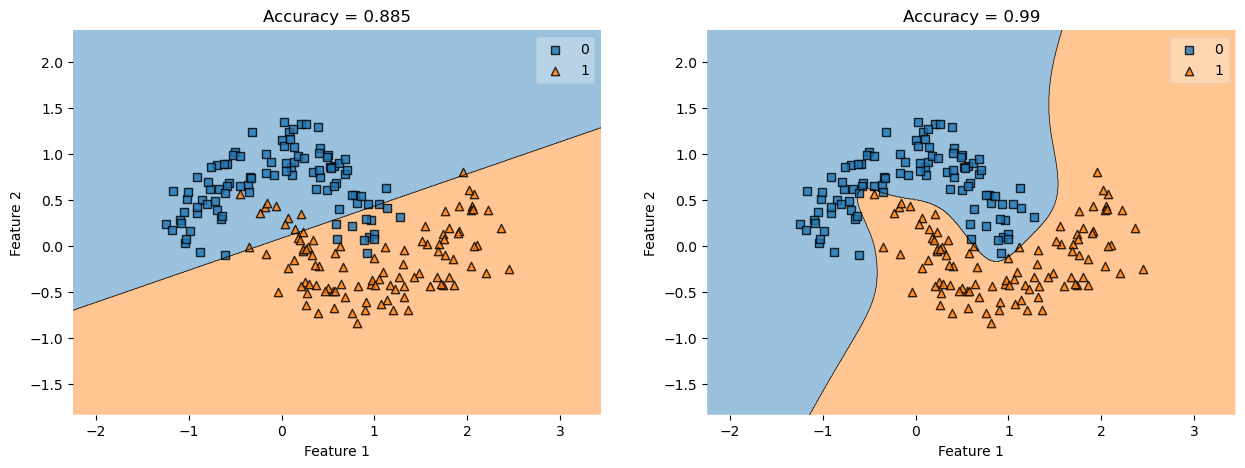

In [3]:
plt.rcParams["figure.figsize"] = (15, 5)
fig, ax = plt.subplots(1, 2)

#plotting regular Logistic Regression
plot_decision_regions(X, y, clf = LR, ax=ax[0])
ax[0].set_xlabel('Feature 1')
ax[0].set_ylabel('Feature 2')
ax[0].set_title(f"Accuracy = {(LR.score(X,y))}")

#plotting regular Logistic Regression
plot_decision_regions(X, y, clf = KLR, ax=ax[1])
ax[1].set_xlabel('Feature 1')
ax[1].set_ylabel('Feature 2')
ax[1].set_title(f"Accuracy = {(KLR.score(X,y))}")

plt.show()

Therefore, we can clearly see how regular logistic regression, finds the best "straight line" that divides the two classes. However, it is not able to learn the "curvy" nature of the data. On the other hand, kernel logistic regression is able to learn that "curvy" nature, and therefore has a better performance at our classification task. 

# What is Kernel Logistic Regression?
Originally, when we were dealing with Logistic Regression, our empirical risk minimization problem was:<br><br>
<center> $\hat{\mathbf{w}} = \mathop{\mathrm{arg\,min}}_{\mathbf{w}} \; L(\mathbf{w})\;$ </center>
<br>where, our loss function $L(\mathbf{w})\;$ was defined as:<br><br>
<center> $L(\mathbf{w}) = \frac{1}{n} \sum_{i = 1}^n \ell(\langle \mathbf{w}, \mathbf{x}_i \rangle, y_i)\;$ </center>
<br>Now, in Kernel Logistic Regression, we want to map our original features onto a higher-dimensional space, where it possible to linearly classify our data, for this purpose our empirical risk minimization problem becomes:
<center> $L_k(\mathbf{v}) = \frac{1}{n} \sum_{i = 1}^n \ell(\langle \mathbf{v}, \boldsymbol{\kappa}(\mathbf{x}_i) \rangle, y_i)\;
\tag{1}$ </center>

<br>Basically, what we do is we take the rows of the original feature matrix $X$: $x_i$, and perform the mapping $\boldsymbol{\kappa}(\mathbf{x}_i)$ on it. Performing this operation on a feature row $x_i$ results in a modified feature vector $\boldsymbol{\kappa}(\mathbf{x}_i)$, which has entries:

<center> $\boldsymbol{\kappa}(\mathbf{x}_i) = \left( \begin{matrix}
    k(\mathbf{x}_1, \mathbf{x}_i) \\
    k(\mathbf{x}_2, \mathbf{x}_i) \\
    \vdots \\
    k(\mathbf{x}_n, \mathbf{x}_i)
\end{matrix}\right)\;$ </center>
<br>Here, $k(\mathbf{x}_1, \mathbf{x}_i)$ performs the kernel operation between two feature rows, and produces a single-value which for simplicity can be understood as the "similarity" between these two feature rows. Performing this operation on every feature row of the original feature matrix, with respect to every other feature row of the original feature matrix gives us the <u>kernel matrix</u>:<br><br>
<center> $\boldsymbol{\kappa}(\mathbf{X}) = \left( \begin{matrix}
    k(\mathbf{x}_1, \mathbf{x}_1) \hspace{1cm} k(\mathbf{x}_1, \mathbf{x}_2) \hspace{1cm} k(\mathbf{x}_1, \mathbf{x}_3) \hspace{1cm} k(\mathbf{x}_1, \mathbf{x}_n) \\
    k(\mathbf{x}_2, \mathbf{x}_1) \hspace{1cm} k(\mathbf{x}_2, \mathbf{x}_2) \hspace{1cm} k(\mathbf{x}_2, \mathbf{x}_3) \hspace{1cm} k(\mathbf{x}_2, \mathbf{x}_n)\\
    \vdots \\
    k(\mathbf{x}_n, \mathbf{x}_1) \hspace{1cm} k(\mathbf{x}_n, \mathbf{x}_2) \hspace{1cm} k(\mathbf{x}_n, \mathbf{x}_3) \hspace{1cm} k(\mathbf{x}_n, \mathbf{x}_n)
\end{matrix}\right)\;$ </center>

<br>Therefore, in the <u>kernel matrix</u> $\boldsymbol{\kappa}(\mathbf{X})$, each column $i$ corresponds to the kernel operation done for the $i$th row of the original feature matrix, with respect to all feature rows in the original feature matrix. Therefore, we can see that our original feature matrix $X \in \mathbb{R}^{nxp}$, becomes the kernel matrix $\boldsymbol{\kappa}(\mathbf{X}) \in \mathbb{R}^{nxn}$, with more features we are in a better position to study the data in a higher-dimensional space. However, the fact that our matrix is now $nxn$ means that we need to modify our weight vector as well. Our original feature vector was $w \in \mathbb{R}^{p}$, but now our modified weight vector is $v \in \mathbb{R}^{n}$. For each column $i$ of the kernel matrix, the prediction is performed as follows:<br><br>
<center>$\hat{y} = \langle \hat{\mathbf{v}}, \boldsymbol{\kappa}(\mathbf{x_i}) \rangle\;$</center>

<br><u>Important Note:</u> By definition, a regular multiplication of the feature matrix and the weight vector happens along the rows of the matrix, rather than the columns. However, by the properties of a kernel matrix created between the same matrix twice, we are guaranteed symmetry - so we do not need to transpose the matrix. This idea of transposition will become relevant when we perform the prediction function on unseen data (a new feature matrix).

# Implementation and Explanation of Code
For my implementation of Kernel Logistic Regression, these are some of the important functions:

<b>1. <u>fit</u> function:</b>
```python
def fit(self, X, y):
    self.X_train = X 
    #computing the kernel matrix - which is an NxN matrix 
    km = self.kernel(X, X, **self.kernel_kwargs)
    #initializing random weight vector - v0
    v0 = np.random.rand(X.shape[0])
    #minimize the self.loss function return value by adjusting the v paramater
    #for starters: take the v parameter as v0
    result = minimize(lambda v: self.loss(km, y, v), x0 = v0)
    self.v = result.x
```
We first take the original matrix, and save an instance of it for future use - when we perform <i>predict</i> on unseen data. We then calculate the kernel matrix of the original feature matrix with respect to itself. Now, we can go ahead and initialize a random weight vector $v \in \mathbb{R}^{n}$. To find the optimal weight vector, we use the <i>minimize</i> function from <i>scipy.optimize</i>. Here, we pass our loss function - which utilizes logistic loss. 
<br><br><b>2. <u>predict</u> function:</b>
```python
def predict(self, X):
    km = self.kernel(self.X_train, X, **self.kernel_kwargs)
    km_transpose = km.T
    return 1*((km_transpose@self.v)>0)
```
The idea behind Kernel Logistic Regression, when making predictions for unseen data (validation data) is as follows:
<ol>
    <li>For Feature Transformation - creata a Kernel Matrix using the original feature matrix and the new (unseen) feature matrix
    <li>For Predictions - use the optimal weight vector $v$ to make predictions on this Kernel Matrix
</ol>
Therefore, we first create a kernel matrix from our saved instance of the original feature matrix and the unseen feature matrix. Now, the step where we have to transpose the matrix could have been avoided if we switched the order in which we pass the parameters to the <i>kernel</i> function. However, for this code - the original training feature matrix is $X_\text{training} \in \mathbb{R}^{nxp}$ and the unseen feature matrix is say $X_\text{unseen} \in \mathbb{R}^{mxp}$. Therefore, in the order in which we have passed the parameters, the kernel matrix will be of the order $\mathbb{nxm}$ - $n$ rows and $m$ columns. Since, the multiplication of the (kernel) matrix and the weight vector $v$ happens along the row, and since in this case our kernel matrix is not symmetrical, we transpose the matrix to make it of the order $\mathbb{R}^{mxn}$ - $m$ rows and $n$ columns. Now, our weight vector $v \in \mathbb{R}^n$ can be multiplied along the row, and we will get $m$ predictions - the number of data points in the unseen feature matrix.
<br><br><b>3. <u>RBF Kernel</u> and <u>Gamma</u>:</b>
When creating an object of our KernelLogisticRegression class, we did:

```python
KLR = KernelLogisticRegression(rbf_kernel, gamma = 10)
```
<ul>
    <li> rbf_kernel: the type of kernel function which is used while calculating the kernel matrix  
    <li> gamma: the 'gamma' parameter controls how the model measures the "similarity" between two things. In simpler words, the gamma parameter basically controls how "curvy" and "squiggly" our lines are. A very small gamma value might lead to underfitting, while a very large gamma value might lead to overfitting
</ul>

# The Effect of Gamma
In this section, we want to illustrate the effect that the value of gamma has on the training data and the testing data. Generally, speaking:
<ul>
    <li><u>Good Value of Gamma</u>: good score on the training data + does not overfit + is able to generaliez on unseen data
    <li><u>Very Large Value of Gamma</u>: extremely high score on the training data + overfits + fails to generalize on unseen data
</ul>

#### Good Value of Gamma
First generating and fitting our model on the training data:

In [4]:
#training data
X, y = make_moons(200, shuffle = True, noise = 0.2)
KLR = KernelLogisticRegression(rbf_kernel, gamma = 10)
KLR.fit(X, y)
plot_decision_regions(X, y, clf = KLR)
t = title = plt.gca().set(title = f"Accuracy = {KLR.score(X, y)}",
                      xlabel = "Feature 1", 
                      ylabel = "Feature 2")

Now generating unseen data with similar pattern, and assessing our model's performance on this unseen data:

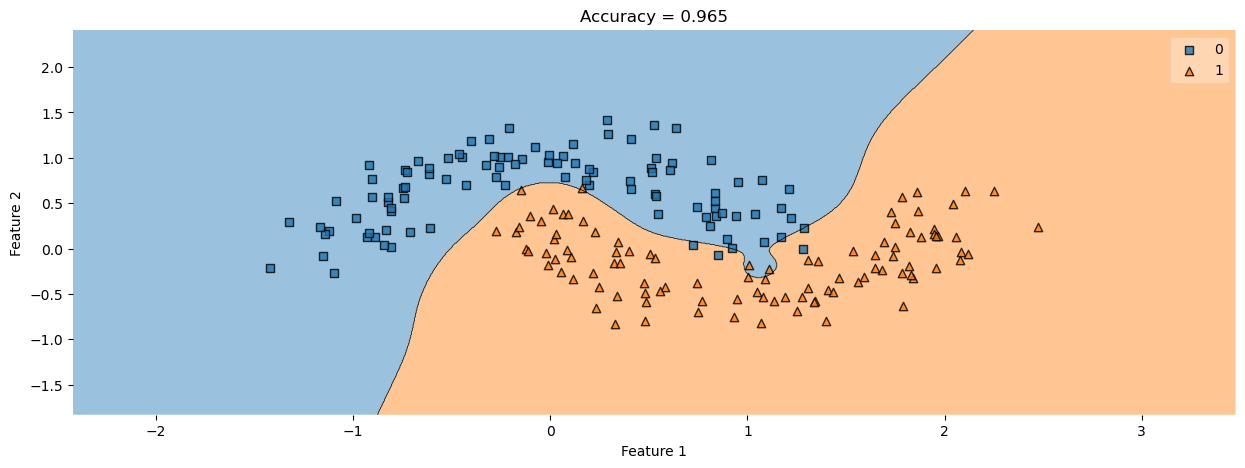

In [5]:
#unseen data with similar pattern 
X, y = make_moons(200, shuffle = True, noise = 0.2)
plot_decision_regions(X, y, clf = KLR)
t = title = plt.gca().set(title = f"Accuracy = {KLR.score(X, y)}",
                      xlabel = "Feature 1", 
                      ylabel = "Feature 2")

The model performs fairly well on the unseen data. Therefore, we can conclude that a good value of gamma allows for effective learning and generalization on unseen data. Therefore, we do not run into the risk of overfitting.

#### Very Large Value of Gamma
First, generating some training data and fitting our model on this training data:

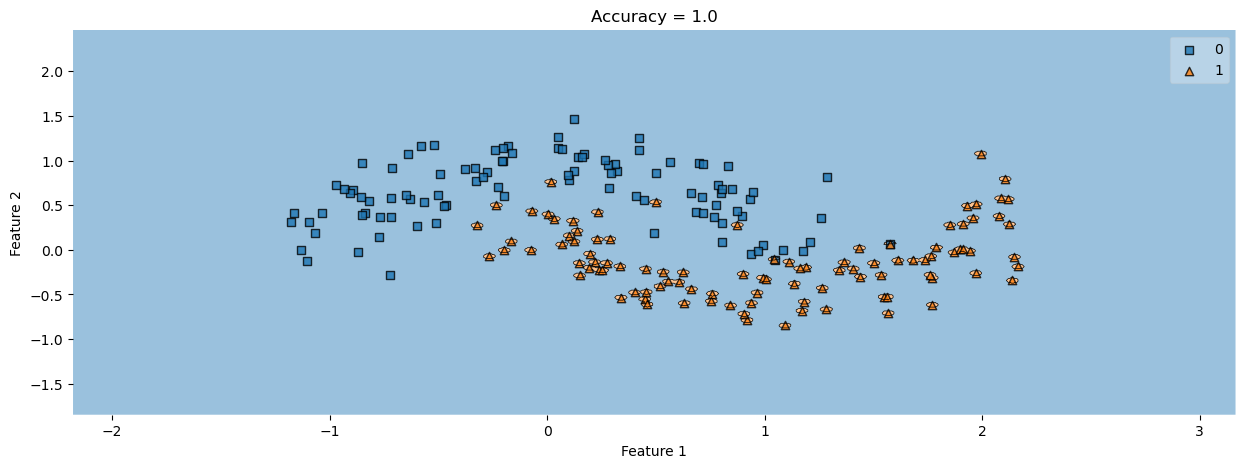

In [6]:
#training data
X, y = make_moons(200, shuffle = True, noise = 0.2)
KLR = KernelLogisticRegression(rbf_kernel, gamma = 1000000)
KLR.fit(X, y)
plot_decision_regions(X, y, clf = KLR)
t = title = plt.gca().set(title = f"Accuracy = {KLR.score(X, y)}",
                      xlabel = "Feature 1", 
                      ylabel = "Feature 2")

Now generating unseen data with similar pattern, and assessing our model's performance on this unseen data:

In [7]:
#unseen data with similar pattern 
X, y = make_moons(200, shuffle = True, noise = 0.2)
plot_decision_regions(X, y, clf = KLR)
t = title = plt.gca().set(title = f"Accuracy = {KLR.score(X, y)}",
                      xlabel = "Feature 1", 
                      ylabel = "Feature 2")

Although, a dramatic example it goes on to show us that choosing a very large value of gamma leads to immense overfitting. The decision boundaries become a bunch of "squiggly" lines and the model learns the noise on the training data. Therefore, the model achieves perfect score on the training data. However, when we evaluate this model's performance on unseen data, it fails to generalize and achieves a really low score on this unseen data.

# Finding the Best Value of Gamma
Now, let us perform an experiment in which we will find the best value of gamma. To do this, we will evaluate the score of our Kernel Logistic Regression model (with varying values of gamma) on both the training data, and the testing data and look at the results. Since, we are also going to be performing this experiment with varying levels of <i>noise</i> and for different shapes of data, it is useful to construct a function that can easily be called:

In [8]:
np.random.seed()
def performExperiment(dataShape, noise = 0.2, gamma = [-5, 6]):
    gammaVal = 10.0**np.arange(gamma[0], gamma[1])
    df = pd.DataFrame({"gamma": [], "train" : [], "test" : []})
    #finding accuracy over 10 runs
    for rep in range(10):
        X_train, y_train = dataShape(100, shuffle = True, noise = noise)
        X_test, y_test = dataShape(100, shuffle = True, noise = noise)
        for gamma in gammaVal:
            KLR = KernelLogisticRegression(rbf_kernel, gamma = gamma)
            KLR.fit(X_train, y_train)
            to_add = pd.DataFrame({"gamma" : [gamma],
                                   "train" : [KLR.score(X_train, y_train)],
                                   "test" : [KLR.score(X_test, y_test)]})
            df = pd.concat((df, to_add))
    
    means = df.groupby("gamma").mean().reset_index()
    
    plt.plot(means["gamma"], means["train"], label = "training")
    plt.plot(means["gamma"], means["test"], label = "testing")
    plt.loglog()
    plt.legend()
    labs = plt.gca().set(xlabel = "Value of Gamma", ylabel = "Accuracy (mean over 10 runs)")

Now, that we have this function that we can call, let us see which value of gamma works best for the moon shape:

In [9]:
performExperiment(make_moons)

We can clearly see that an extremely small value of gamma is no good. We can see that the accuracy starts to pick up around <i>gamma</i> = $10^{-1}$. So, for better visualization, we can change our gamma value:

In [10]:
performExperiment(make_moons, gamma = [-1, 6])

Much better! From this graph, it seems like the value of gamma that performs the best on the testing data is around <i>gamma</i> = $10^{2} = 100$.

#### "Noise" and the Best Value of Gamma
Now, we can experiment with differing noise levels and see the effect that has on the "best" value of gamma. Noise determines how much variability will be in our data, for example in the case of crescents: 0 noise would imply perfect, completely separable crescent shapes made by the two types of data, and 1 noise would imply a lot more overlap.

First for a lower level of noise than the previous experiment:

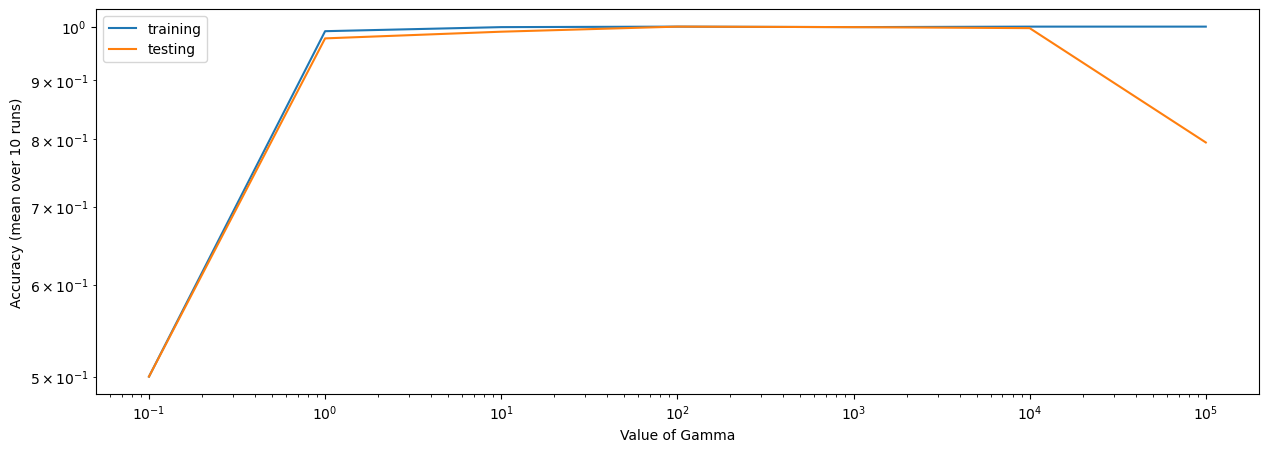

In [11]:
performExperiment(make_moons, noise = 0.1, gamma = [-1, 6])

Next with a higher level of noise than the previous experiment:

In [12]:
performExperiment(make_moons, noise = 0.6, gamma = [-1, 6])

Therefore, we can see that in both cases (although it is more apparent with the experiment with the higher noise), the best value of <i>gamma</i> is still around $100$! Therefore, we can conclude that the best value of <i>gamma</i> does not depend strongly on the noise of the data. However, there are many other considerations that we have to be wary of. We must note that in different noise levels, the best <i>gamma</i> value, although the same, yields different accuracies. This is because data with lower noise is more easily separable, while data with higher noise is harder to separate!

# Different Geometries
We can use the <i>make_circles</i> function generate concentric circles, instead of crescents. First, let us visualize what varying levels of "noise" look like in the context of the <i>make_circles</i> function. 

Starting off with an extremely low level of noise:

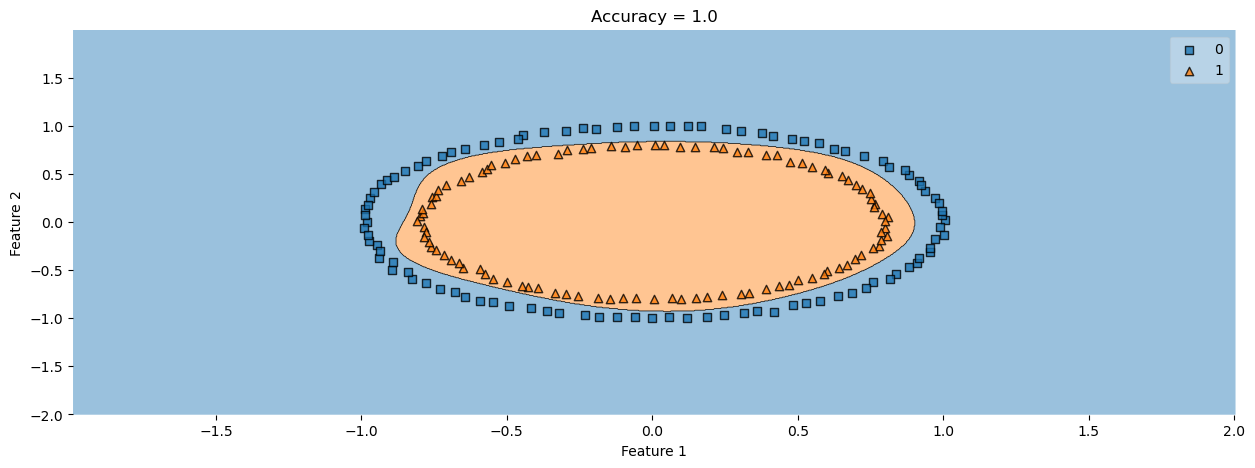

In [13]:
X, y = make_circles(200, shuffle = True, noise = 0.01)
KLR = KernelLogisticRegression(rbf_kernel, gamma = 10)
KLR.fit(X, y)

plot_decision_regions(X, y, clf = KLR)

title = plt.gca().set(title = f"Accuracy = {KLR.score(X, y)}",
                      xlabel = "Feature 1", 
                      ylabel = "Feature 2")

Next, looking at a relatively high level of noise:

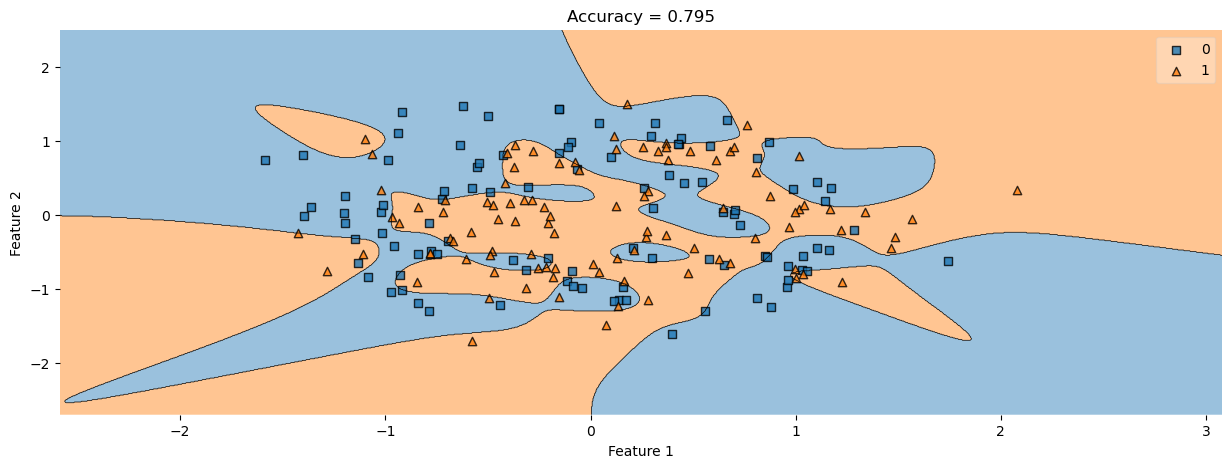

In [14]:
X, y = make_circles(200, shuffle = True, noise = 0.4)
KLR = KernelLogisticRegression(rbf_kernel, gamma = 10)
KLR.fit(X, y)

plot_decision_regions(X, y, clf = KLR)

title = plt.gca().set(title = f"Accuracy = {KLR.score(X, y)}",
                      xlabel = "Feature 1", 
                      ylabel = "Feature 2")

Therefore, we can clearly see the data with the higher noise has way more variability in where the points fall. Because of this, the Kernel Logistic Regression model performs way better on data with low noise, as compared to data with higher noise. Now, in order to find the best value of <i>gamma</i> for this data, we can repeat the previous experiment but now with circles:

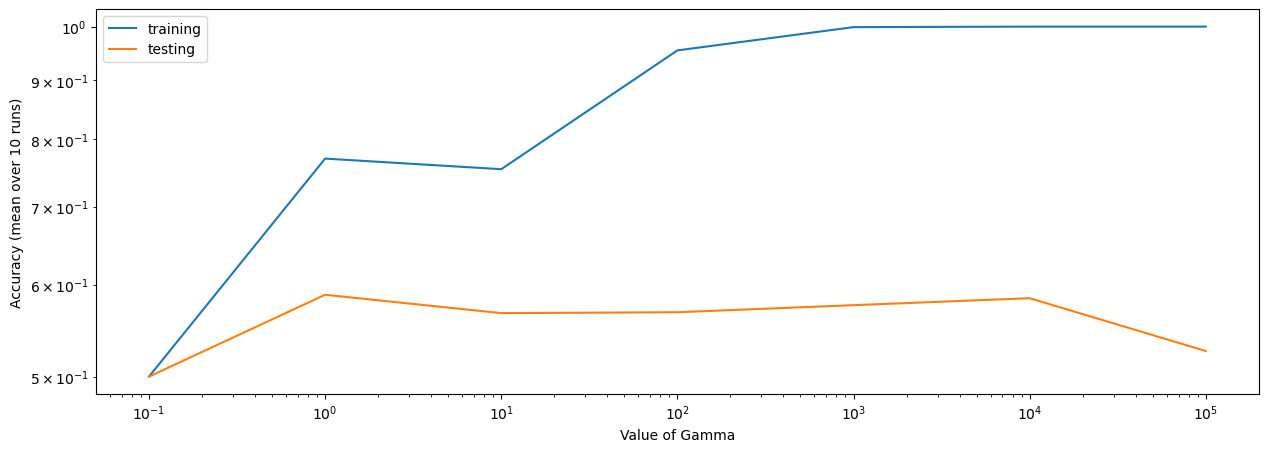

In [15]:
performExperiment(make_circles, gamma = [-1, 6])

Seems, like <i>gamma</i>=$10^{0} = 1$ performs the best on our testing data!